In [1]:
from pya import *
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed, widgets
%matplotlib qt5
%matplotlib inline
import pandas as pd
import pyaudio
from collections import deque
import time

In [2]:
class SequenceStream2():
    def __init__(self, bs = 256,  sr = 44100, channels = 1):
        self.pa = pyaudio.PyAudio()
        self.outputChannels =  channels # Work on this later. 
        self.fs = sr; self.chunk = bs # The smaller the smaller latency 
        self.audioformat = pyaudio.paInt16
        self.emptybuffer = np.zeros(self.chunk * self.outputChannels).astype(np.int16)
  
    def openstream(self):
        try:  
            self.playStream.stop_stream()
            self.playStream.close()
        except AttributeError:
            pass
        self.dataflag = False
        self.framecount = 0
        self.len = -1 
        self.playStream = self.pa.open(
            format = self.audioformat,
            channels = self.outputChannels, 
            rate = self.fs,
            input = False,
            output = True,
            output_device_index=1,
            frames_per_buffer = self.chunk,
            stream_callback=self._playcallback
           )
        self.playStream.start_stream()

    def play(self, onset, sig):
        play_data = self.mixing_function(onset, sig)
        play_data = (32767 * play_data).astype(np.int16)
        self.play_data = self.makechunk(play_data, self.chunk)
        self.framecount = 0
        self.len = len(self.play_data)
#         self.dataflag = True


    def mixing_function(self, onset, sig):
        maxlen = np.max([o + len(s) for o, s in zip(onset, sig)])
        result =  np.zeros(maxlen)
        for i in range(len(onset)):
            result[onset[i]:onset[i] + len(sig[i])] += sig[i] 
        return result

    def mix(self, onset, sig):
        siglengths = np.vectorize(len)(sig)
        maxlen = max(onset + siglengths)
        result = np.zeros(maxlen)
        for i in range(len(sig)):
            result[onset[i]: onset[i]+siglengths[i]] += sig[i]
        return result


    def makechunk(self, lst, chunk):
        result = []
        for i in np.arange(0, len(lst), chunk):
            temp = lst[i:i + chunk]
            if len(temp) < chunk:
                temp = np.pad(temp, (0, chunk - len(temp)), 'constant')
            result.append(temp)
        return result

    
    def _playcallback(self, in_data, frame_count, time_info, flag):  
        if (self.framecount < self.len):
            out_data = self.play_data[self.framecount]

            self.framecount +=1
        else:
            out_data = self.emptybuffer
        return bytes(out_data), pyaudio.paContinue

    def closestream(self):
        try: # To prevent self.playStream not created before stop button pressed
            self.playStream.stop_stream()
            self.playStream.close()
            print ("Play Stream Stopped. ")
        except AttributeError:
            print ("No stream, stop button did nothing. ")

In [8]:
# Try snap with lots of triggers. 
astereo = Asig("samples/stereoTest.wav", label='stereo')
# astereo.sig.shape[1]
# asen.size()
# onset = [0, 3000,10000]
# sig = [asen.sig, asen.sig, asen.sig]
# stream = SequenceStream2(bs = 512, sr = 24000)
# stream.openstream()


Asig('stereo'): 2 x 176400 @ 44100 Hz = 4.000 s

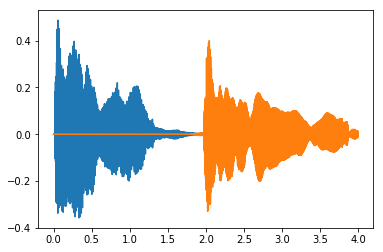

In [10]:
astereo.plot()

In [5]:
asen = Asig("samples/sentence.wav", label='stereo')
asen.channels

1

In [6]:
asen.play()

resample as sr is exotic
Play sound. 


Asig('stereo'): 1 x 61632 @ 24000 Hz = 2.568 s

In [ ]:
t0 = time.time()
stream.play(onset, sig)
print (time.time() - t0)
# plt.plot(a[4])

In [ ]:
print (a[3].dtype)

In [ ]:
stream.closestream()

In [ ]:
asen.play()

In [ ]:
asen.play().plot()

In [ ]:
asen.play2()

In [ ]:
# sig1 = 0.3 * np.sin(2*np.pi * 300 * np.linspace(0,1,24000 * 2))
# sig2 = 0.3 * np.sin(2*np.pi * 6000 * np.linspace(0,1,24000 * 2))
# sig3 = 0.3 * np.random.random(24000 * 3) - 0.15
onset = [0, 24000, 48000]
sig = [asen.sig, asen.sig, asen.sig]

In [ ]:
stream = SequenceStream(bs = 512, sr = 24000)
stream.openstream()
stream.play(onset, sig)

In [ ]:
stream.closestream()

In [ ]:
plt.plot(sig1, 'r');plt.plot(sig2, 'b');plt.plot(sig3, 'g')

In [ ]:

# onset = np.array([0, 2000, 40000])
# sig = np.array([sig2, sig1, sig3])
# signal1 = np.array([1,2,3,4])
# signal2 = np.array([5,5,5])
# signal3 = np.array([7,7,7,7])
# sig = np.array([signal1,signal2,signal3])

def mixing_function(sig,onset):
    maxlen = np.max([o + len(s) for o, s in zip(onset, sig)])
    result =  np.zeros(maxlen)
    for i in range(len(onset)):
        result[onset[i]:onset[i] + len(sig[i])] += sig[i] 
    return result

mixed_sig = mixing_function(sig, onset)


In [ ]:
# %timeit mixed_sig = mixing_function(sig, onset)

In [ ]:
plt.plot(mixed_sig)

In [ ]:
maxlen = np.max([o + len(l) for o, l in zip(onset, sig)])
mixed_sig =  np.zeros(maxlen)
for i in range(len(onset)):
    mixed_sig[onset[i]:onset[i] + len(sig[i])] += sig[i] 
mixed_sig
# for i in mixed_sig:
#     print (i)

In [ ]:
maxlen = np.max([o + len(l) for o, l in zip(onset, sig)])
result =  np.zeros(maxlen)
result = []

for i in range(len(onset)):
    mixed_sig[onset[i]:onset[i] + len(sig[i])] += sig[i] 
mixed_sig

In [ ]:
signal1 = np.array([1,2,3,4])
signal2 = np.array([5,5,5])
signal3 = np.array([7,7,7,7])
onset(0, 2, 8)

result = np.array([1,2,8,9,5,0,0,0,7,7,7,7])
print ('nothing')

In [ ]:
plt.plot(sig_stacked[0])

In [ ]:
plt.plot(sig_stacked[0], 'r');plt.plot(sig_stacked[0], 'b');plt.plot(sig_stacked[0], 'g')

In [ ]:
%timeit maxlen = np.max([o + len(l) for o, l in zip(onset, sig)])

In [ ]:
aseq = np.zeros(1024)
# dq = deque([aseq, aseq, aseq, aseq], maxlen=4)
dq = deque([1, 2, 3, 4], maxlen=4)

In [ ]:
dq = deque([1, 2, 3, 4], maxlen=4)

In [ ]:
print (dq[0])
dq.rotate(-1)
dq[-1] = 5
print (dq[0])
dq.rotate(-1)
dq[-1] = 6
print (dq[0])
dq.rotate(-1)
dq[-1] = 7
print (dq[0])

In [ ]:
dq[-1] = 5
dq

In [ ]:
print (b)

In [ ]:
import numpy as np
from time import time
np.random.seed(42)

def mixing_function(sig, onset):
    maxlen = np.max([o + len(s) for o, s in zip(onset, sig)])
    result =  np.zeros(maxlen)
    for i in range(len(onset)):
        result[onset[i]:onset[i] + len(sig[i])] += sig[i] 
    return result

def mix(sig, onset):
    siglengths = np.vectorize(len)(sig)
    maxlen = max(onset + siglengths)
    result = np.zeros(maxlen)
    for i in range(len(sig)):
        result[onset[i]: onset[i]+siglengths[i]] += sig[i]
    return result


sigbig = [np.random.randn(np.random.randint(1000, 10000)) for _ in range(10000)]
onsetbig = np.random.randint(0, 10000, size=10000)

assert all(mixing_function(sigbig, onsetbig) == mix(sigbig, onsetbig))

%timeit result = mixing_function(sigbig, onsetbig)
%timeit result = mix(sigbig, onsetbig)



In [41]:
a = np.array(([1,10],[2,20],[3,30], [4,40]))

In [42]:
a.shape

(4, 2)

In [43]:
b = a.reshape(a.shape[0]*  a.shape[1])

In [44]:
b

array([ 1, 10,  2, 20,  3, 30,  4, 40])

In [47]:
a *= 5

In [49]:
b += 12

In [50]:
a


array([[ 22, 112],
       [ 32, 212],
       [ 42, 312],
       [ 52, 412]])